# House Prices: Advanced Regression Techniques

In [1]:
% matplotlib inline

from __future__ import print_function

import copy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.grid_search import GridSearchCV


/Users/shota/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/shota/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# データの読み込み

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print('Number of Rows: %i   Number of Columns: %i' % train_data.shape)

Number of Rows: 1460   Number of Columns: 81


In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## データ理解

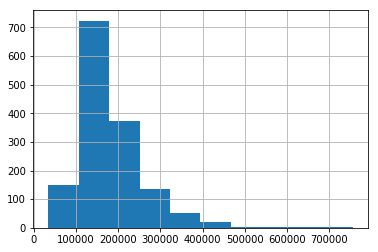

In [8]:
train_data['SalePrice'].hist()

In [9]:
#plt.hist(np.log(train_data['SalePrice']))

/Users/shota/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


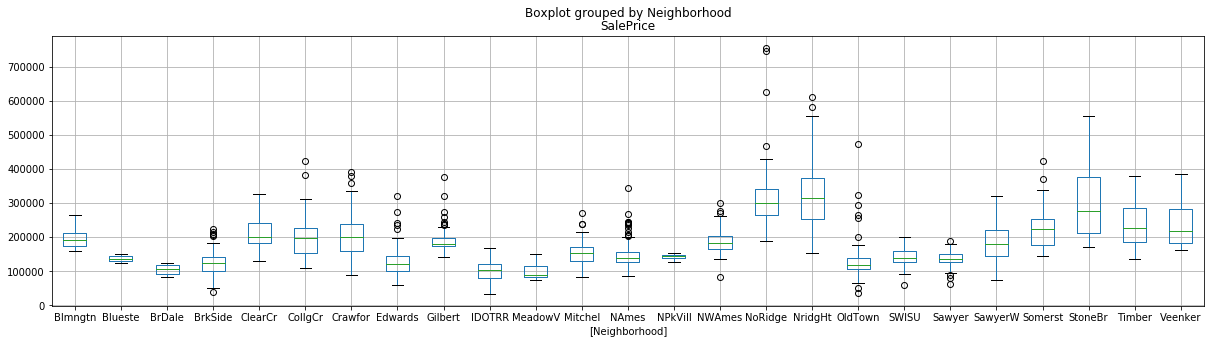

In [11]:
train_data[['Neighborhood', 'SalePrice']].boxplot(by='Neighborhood',figsize=(20, 5))

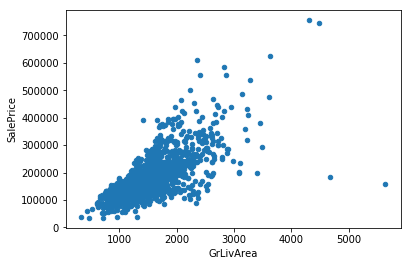

In [13]:
train_data.plot(kind='scatter', x='GrLivArea', y='SalePrice')

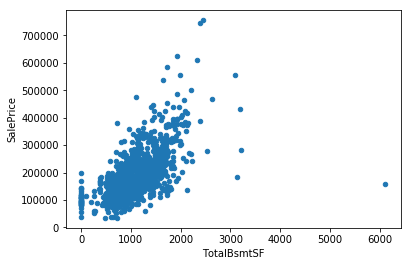

In [16]:
#TotalBsmtSF：地下1階の合計平方フィート
train_data.plot(kind='scatter', x='TotalBsmtSF', y='SalePrice')

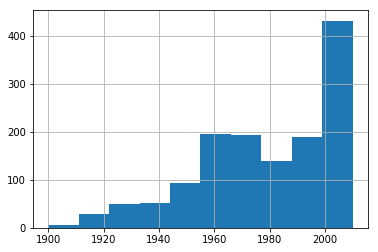

In [24]:
train_data['GarageYrBlt'].hist()

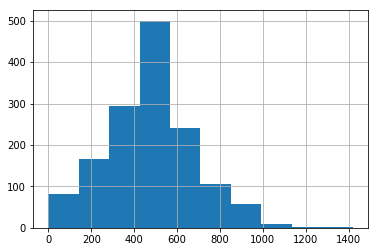

In [26]:
train_data['GarageArea'].hist()

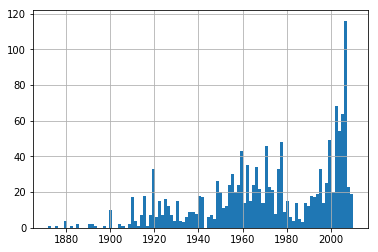

In [29]:
train_data['YearBuilt'].hist(bins=100)

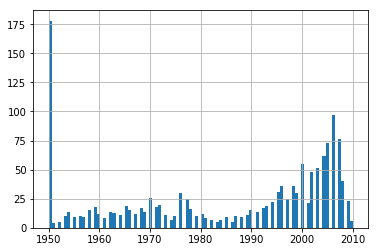

In [30]:
train_data['YearRemodAdd'].hist(bins=100)

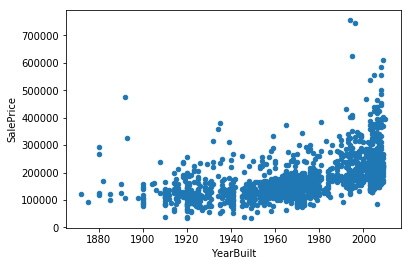

In [37]:
train_data.plot(kind='scatter', x='YearBuilt', y='SalePrice')

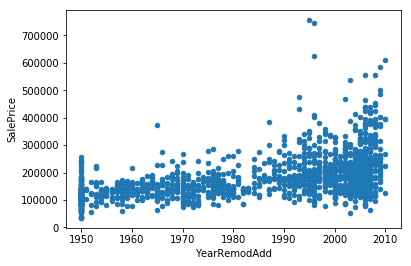

In [38]:
train_data.plot(kind='scatter', x='YearRemodAdd', y='SalePrice')

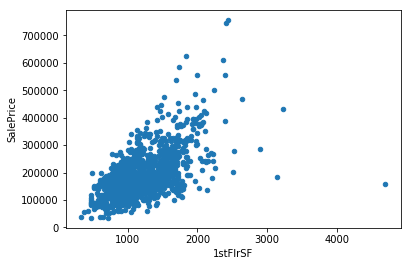

In [46]:
#1stFlrSF
train_data.plot(kind='scatter', x='1stFlrSF', y='SalePrice')

/Users/shota/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


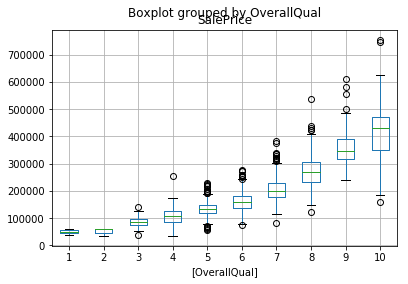

In [50]:
#OverallQual
train_data[['OverallQual', 'SalePrice']].boxplot(by='OverallQual')

# 特徴量調整

## データ結合

In [69]:
#Idを他に移して削除
print('train_data(before dropping) :Number of Rows %i   Number of Columns %i' % train_data.shape)
print('test_data(before dropping) :Number of Rows %i   Number of Columns %i' % test_data.shape)

train_ID = train_data['Id']
test_ID = test_data['Id']

train_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)

print('train_data(after dropping) :Number of Rows %i   Number of Columns %i' % train_data.shape)
print('test_data(after dropping) :Number of Rows %i   Number of Columns %i' % test_data.shape)

train_data(before dropping) :Number of Rows 1460   Number of Columns 81
test_data(before dropping) :Number of Rows 1459   Number of Columns 80
train_data(after dropping) :Number of Rows 1460   Number of Columns 80
test_data(after dropping) :Number of Rows 1459   Number of Columns 79


In [70]:
#SalePriceを他に移して削除
num_train = train_data.shape[0]
num_test = test_data.shape[0]
y_train_data_organic = train_data.SalePrice.values
y_train_data = np.log(train_data.SalePrice.values)
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print('all_data :Number of Rows %i   Number of Columns %i' % all_data.shape)

all_data :Number of Rows 2919   Number of Columns 79


## 欠損値

###### 欠損値をチェック

In [71]:
col_names = all_data.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(all_data[col_name]))
    if missing_num > 0:
        print(col_name, '; # of missing record: ', missing_num)

Alley ; # of missing record:  2721
BsmtCond ; # of missing record:  82
BsmtExposure ; # of missing record:  82
BsmtFinSF1 ; # of missing record:  1
BsmtFinSF2 ; # of missing record:  1
BsmtFinType1 ; # of missing record:  79
BsmtFinType2 ; # of missing record:  80
BsmtFullBath ; # of missing record:  2
BsmtHalfBath ; # of missing record:  2
BsmtQual ; # of missing record:  81
BsmtUnfSF ; # of missing record:  1
Electrical ; # of missing record:  1
Exterior1st ; # of missing record:  1
Exterior2nd ; # of missing record:  1
Fence ; # of missing record:  2348
FireplaceQu ; # of missing record:  1420
Functional ; # of missing record:  2
GarageArea ; # of missing record:  1
GarageCars ; # of missing record:  1
GarageCond ; # of missing record:  159
GarageFinish ; # of missing record:  159
GarageQual ; # of missing record:  159
GarageType ; # of missing record:  157
GarageYrBlt ; # of missing record:  159
KitchenQual ; # of missing record:  1
LotFrontage ; # of missing record:  486
MSZoning 

###### 相関をチェック

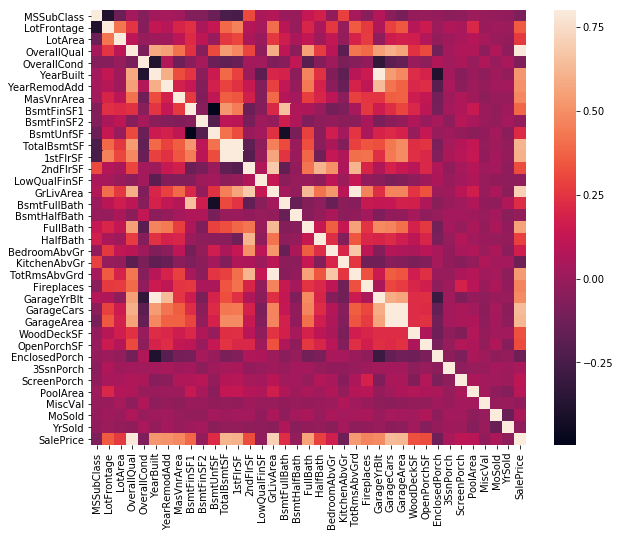

In [73]:
#特徴量相関マップ
corrmat = train_data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, vmax=0.8, square=True)

###### 欠損値を「None」に変換

欠損値が「なし」という意味の場合、「None」で埋める

In [74]:
na_none_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                'FireplaceQu',
                'GarageType','GarageFinish','GarageQual','GarageCond',
                'PoolQC',
                'Fence',
                'MiscFeature',
                'MasVnrType',
                'Alley']
for col in na_none_cols:
    all_data[col] = all_data[col].fillna('None')

###### 欠損値を平均で埋める

In [77]:
#LotFrontage：「Neighborhoodごとの平均」でうめる
all_data['LotFrontage'] = \
    all_data.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.mean())
    )

###### 欠損値を固定値で埋める

0で埋める

In [78]:
na_zero_cols = ['GarageArea', 'GarageCars','GarageYrBlt',
               'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
               'MasVnrArea']
for i in na_zero_cols:
    all_data[i] = all_data[i].fillna(0)

最頻値で埋める

In [80]:
na_mode_cols = ['MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType','Utilities']
for i in na_mode_cols:
    all_data[i] = all_data[i].fillna(all_data[i].mode()[0])

その他

In [81]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

## 順序尺度の質的変数を量的変数に変換

###### ちゃんと変換

【6段階】Ex:5,Gd:4,TA:3,Fa:2,Po:1,(NA:0)

In [82]:
#変換対象変数
change_int_01_cols = ['KitchenQual','FireplaceQu', 'BsmtQual', 'BsmtCond', 
                      'GarageQual', 'GarageCond','ExterQual','ExterCond', 'KitchenQual']

In [83]:
#変換関数
def change_int_01(x):
    if x == 'Ex':
        return int(5)
    elif x == 'Gd':
        return int(4)
    elif x == 'TA':
        return int(3)
    elif x == 'Fa':
        return int(2)
    elif x == 'Po':
        return int(1)
    elif x == 'None':
        return int(0)
    elif x != x:
        return int(0) #NaNだったら0にする
    else:
        return int(x) #上記以外（数字）が入ってたらそのままにしておく

In [84]:
#尺度変数を量的変数に変換
for i in change_int_01_cols:
    all_data[i] = all_data[i].apply(change_int_01)

【5段階】Gd:4,Av:3,Mn:2,No:1,(NA:0) 

In [86]:
change_int_02_cols = ['BsmtExposure']

In [87]:
#変換関数
def change_int_02(x):
    if x == 'Gd':
        return int(4)
    elif x == 'Av':
        return int(3)
    elif x == 'Mn':
        return int(2)
    elif x == 'No':
        return int(1)
    elif x == 'None':
        return int(0)
    elif x != x:
        return int(0) #NaNだったら0にする
    else:
        return int(x) #上記以外（数字）が入ってたらそのままにしておく

In [88]:
#尺度変数を量的変数に変換
for i in change_int_02_cols:
    all_data[i] = all_data[i].apply(change_int_02)

###### ざっくり変換

In [89]:
change_int_cols = ('PoolQC', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 
                   'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir')

In [90]:
for i in change_int_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[i].values)) 
    all_data[i] = lbl.transform(list(all_data[i].values))

In [91]:
print('all_data :Number of Rows %i   Number of Columns %i' % all_data.shape)

all_data :Number of Rows 2919   Number of Columns 79


# 特徴量作成

### 割り算したくない特徴量

In [92]:
exclude_cols = ['TotalSF','QualYear']

### 個別に作成

In [93]:
#全体の面積
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

#評価を加味した建築年
all_data['QualYear'] = \
    all_data['YearBuilt'] + (all_data['YearRemodAdd'] - all_data['YearBuilt'])*all_data['OverallQual']/10


In [94]:
##地域平均,地域別係数を作成

#変換対象変数
make_by_nh_cols = ['GrLivArea','LotArea','TotalSF','TotalBsmtSF','1stFlrSF']

#尺度変数を量的変数に変換
for i in make_by_nh_cols:
    all_data[i+'Mean'] = all_data.groupby('Neighborhood')[i].transform(lambda x: x.mean())
    all_data[i+'Rate'] = all_data[i]/all_data[i+'Mean']
    exclude_cols.append(i+'Mean')
    exclude_cols.append(i+'Rate')


### カテゴリ番号をカテゴリ変数に変換

In [95]:
#カテゴリ番号をOBJECTに変換
all_data['MSSubClass'] = all_data['MSSubClass'].astype('str')

### カテゴリ変数をダミー変数に変換

In [96]:
all_data = pd.get_dummies(all_data)
print('all_data :Number of Rows %i   Number of Columns %i' % all_data.shape)

all_data :Number of Rows 2919   Number of Columns 253


## 特徴量を指定

In [97]:
feature_cols = [col for col in all_data.columns if col not in exclude_cols]

## 特徴量を割り算で作成

In [99]:
cutoff_r = 0.5
new_added_col = []
for i in range(0, len(feature_cols)-1):
    for j in range(i+1, len(feature_cols)):
        first_col_name = feature_cols[i]
        second_col_name = feature_cols[j]
        r = spearmanr(all_data[first_col_name], all_data[second_col_name]).correlation
        if abs(r) > cutoff_r:
            new_colname = first_col_name + "_div_" + second_col_name
            all_data[new_colname] = all_data[first_col_name] / (all_data[second_col_name] + 0.01)
            new_added_col.append(new_colname)

In [100]:
feature_cols = feature_cols + new_added_col + exclude_cols

In [101]:
len(feature_cols)

404

## データを再分割

In [102]:
train_data = all_data[:num_train]
test_data = all_data[num_train:]

In [103]:
print('train_data :Number of Rows %i   Number of Columns %i' % train_data.shape)
print('test_data :Number of Rows %i   Number of Columns %i' % test_data.shape)

train_data :Number of Rows 1460   Number of Columns 404
test_data :Number of Rows 1459   Number of Columns 404


## ランダムフォレストによる特徴量の絞り込み

In [107]:
y = np.array(y_train_data)
X = np.array(train_data)

In [108]:
X_train, X_test, y_train, y_test = \
 train_test_split(X, y, test_size=0.3, random_state=1234)

In [109]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [110]:
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1, max_depth=10, random_state=1234)

In [111]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [112]:
ypred = rf.predict(X_test)

In [113]:
print("Root Means Square:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=ypred)))

Root Means Square: 0.147693420405


## 変数の重要度の確認

In [114]:
def varImpPlot(clf, feature_names, topN = 10, plot = True, verbose = True, imp = True):
    feature_names = np.array(feature_names)
    feature_importance = clf.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    
    topN_feature = feature_importance[sorted_idx][len(feature_importance) - topN:]
    topN_feature_name = feature_names[sorted_idx][len(feature_importance) - topN:]
    pos = np.arange(topN) + .5
    
    rev_sorted_idx = np.argsort(feature_importance)[::-1]
    if plot:
        plt.barh(pos, topN_feature, align='center')
        plt.yticks(pos, topN_feature_name)
        plt.xlabel('Relative Importance')
        plt.title('Variable Importance')
        plt.show()          
    if verbose:
        for i, v in zip(feature_names[rev_sorted_idx], feature_importance[rev_sorted_idx]):
            print(i, v)
    if imp:
        imp_feature_name = feature_names[sorted_idx]
        imp_feature_value = feature_importance[sorted_idx]
        imp_feature = pd.DataFrame({'name' :imp_feature_name,
                                    'importance' : imp_feature_value})
        imp_feature = imp_feature.sort_values(by=['importance'], ascending=False)
        return(imp_feature)


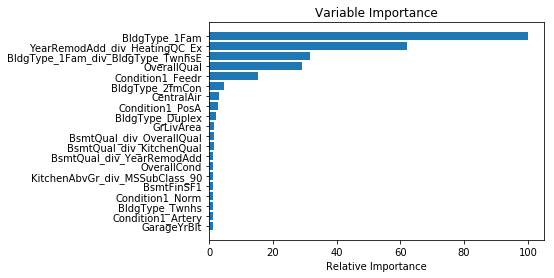

BldgType_1Fam 100.0
YearRemodAdd_div_HeatingQC_Ex 62.2251289072
BldgType_1Fam_div_BldgType_TwnhsE 31.5206091394
OverallQual 29.2842270601
Condition1_Feedr 15.3010082259
BldgType_2fmCon 4.68405444066
CentralAir 3.00873979852
Condition1_PosA 2.7616763108
BldgType_Duplex 2.03310941073
GrLivArea 1.58300630874
BsmtQual_div_OverallQual 1.49393980454
BsmtQual_div_KitchenQual 1.47122252439
BsmtQual_div_YearRemodAdd 1.3641511134
OverallCond 1.35782802383
KitchenAbvGr_div_MSSubClass_90 1.32932866105
BsmtFinSF1 1.29415712606
Condition1_Norm 1.20504468439
BldgType_Twnhs 1.18582190813
Condition1_Artery 1.15602983131
GarageYrBlt 1.11594776519
1stFlrSF 0.972505623223
BsmtUnfSF 0.917793739946
OverallQual_div_Foundation_PConc 0.917116177819
LotArea 0.888556511187
ExterQual_div_FullBath 0.796312207822
LotFrontage 0.733701137494
HeatingQC_TA 0.726813676425
MasVnrArea_div_MasVnrType_BrkFace 0.684305850918
ExterQual_div_GarageYrBlt 0.637715511791
ExterCond 0.615757089478
Condition1_RRAe 0.608979736785
GrLi

In [115]:
varImpPlot(rf, feature_cols, topN=20, plot=True, verbose=True, imp=False)

## 一定の重要度がなければ削除して再度モデル構築

In [116]:
cut_value = 0.2 #削除する閾値
feature_importance = rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_cols_ar = np.array(feature_cols)
new_feature_cols = feature_cols_ar[feature_importance > cut_value]

In [119]:
#追加したい特徴量
add_cols = ['Neighborhood_Edwards']
new_feature_cols = np.append(new_feature_cols, [add_cols])

In [123]:
y = np.array(y_train_data)
X = np.array(train_data[new_feature_cols])

In [124]:
X_train, X_test, y_train, y_test = \
 train_test_split(X, y, test_size=0.3, random_state=1234)

In [125]:
rf2 = RandomForestRegressor(n_estimators=500, n_jobs=-1, max_depth=10, random_state=1234)
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)

In [126]:
print("Root Means Square:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

Root Means Square: 0.147441360377


### 変数増加法で変数選択をしてみる

In [130]:
def get_gfs_feature_indices(X, y, features, clf):
    X_train_, X_test_, y_train_, y_test_ = \
        train_test_split(X, y, test_size=0.3, random_state=1)
    
    #どの特徴量が何列目にあるかを辞書型で保持
    feature_indices = {feature: idx for idx, feature in enumerate(features)}
   
    # 特徴量をユニークにする
    features = set(features)
    
    # 評価（MSE）の初期化
    last_mse = np.inf
    
    #選ばれた特徴量を保存するための空集合を用意
    chosen_features = set()

    while len(chosen_features) < len(features):
        mse_features = []
        
        # 集合は引き算すると差集合
        for feature in (features - chosen_features):
            candidates = chosen_features.union(set([feature]))
            indices = [feature_indices[feature] for feature in candidates]
            clf.fit(X_train_[:, indices], y_train_)
            y_pred = clf.predict(X_test_[:, indices])
            mse = mean_squared_error(y_test_, y_pred)
            mse_features += [(mse, feature)]
            #print('□for:', mse, feature)
        mse, feature = min(mse_features, key= lambda x:x[0])
        
        if mse >= last_mse:
            break
        last_mse = mse
        print('■Newly Added Feature: {},\tRMSE Score: {}'.format(feature, np.sqrt(mse)))
        chosen_features.add(feature)
    return [feature_indices[feature] for feature in chosen_features]

In [131]:
selected_feature_index = \
get_gfs_feature_indices(X=X_train, 
                        y=y_train, 
                        features = new_feature_cols.tolist(), 
                        clf=RandomForestRegressor(random_state=1234, n_estimators=500, n_jobs=-1, max_depth=10))

■Newly Added Feature: GarageCars_div_OverallQual,	RMSE Score: 0.24664002419059622
■Newly Added Feature: 1stFlrSF,	RMSE Score: 0.2276217713516139
■Newly Added Feature: BsmtQual_div_GarageCars,	RMSE Score: 0.21658003288799274
■Newly Added Feature: OverallQual_div_Foundation_PConc,	RMSE Score: 0.2104956230934181
■Newly Added Feature: BsmtFinSF1_div_BsmtUnfSF,	RMSE Score: 0.1998078051547318
■Newly Added Feature: 2ndFlrSF,	RMSE Score: 0.1859651770198756
■Newly Added Feature: CentralAir,	RMSE Score: 0.17987774090616193
■Newly Added Feature: LotArea,	RMSE Score: 0.17464828373951005
■Newly Added Feature: OverallCond,	RMSE Score: 0.1704632025161528
■Newly Added Feature: GarageFinish_div_YearBuilt,	RMSE Score: 0.1663823662451616
■Newly Added Feature: FireplaceQu_div_Fireplaces,	RMSE Score: 0.1633627541871256
■Newly Added Feature: OpenPorchSF,	RMSE Score: 0.15999266360076853
■Newly Added Feature: BsmtFinSF1,	RMSE Score: 0.15971147012925033
■Newly Added Feature: Condition1_PosN,	RMSE Score: 0.1593

In [132]:
rf3 = RandomForestRegressor(random_state=1234, n_estimators=1000, n_jobs=-1, max_depth=10)
rf3.fit(X_train[:, selected_feature_index], y_train)
y_pred = rf3.predict(X_test[:, selected_feature_index])
print("Root Means Square:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

Root Means Square: 0.15684361184


In [133]:
selected_feature_index

[62, 17, 36, 44, 6, 34, 28, 58, 60, 4, 40, 3, 13, 16, 54, 1, 74, 0]

## 機械学習モデルを作る - ランダムフォレスト編

In [137]:
from sklearn.ensemble import RandomForestClassifier

### ハイパーパラメーターのチューニング

In [140]:
params = {'n_estimators' :[1000,1500], 'max_depth':[10],}

In [141]:
params = {'n_estimators' :[100,300,500], 'max_depth':[3,5,10,None],'max_features':['auto','sqrt','log2',None]}

In [142]:
rf4 = RandomForestRegressor()

In [144]:
gcv = GridSearchCV(rf4, param_grid=params, n_jobs=-1, scoring='r2')

In [145]:
gcv.fit(X_train[:, selected_feature_index], y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 10, None], 'max_features': ['auto', 'sqrt', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [146]:
gcv.best_params_

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}

In [147]:
gcv.best_score_

0.8437201519832325

### チューニングしたパラメータでモデルを作る

In [149]:
rf = RandomForestRegressor(n_jobs=-1, 
                           max_depth=None,
                           max_features='sqrt',
                           n_estimators=500)

In [150]:
rf.fit(X_train[:, selected_feature_index], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### 予測

In [151]:
y_pred = rf.predict(X_test[:, selected_feature_index])

### モデルの性能評価

RMSE

In [152]:
print("Root Means Square:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

Root Means Square: 0.157964377278


## 機械学習モデルを作る - AdaBoost

In [153]:
from sklearn.ensemble import AdaBoostRegressor

In [157]:
params = {'n_estimators' :[2000,3000], 'learning_rate':[3]}

In [158]:
ada = AdaBoostRegressor()

In [160]:
gcv = GridSearchCV(ada, param_grid=params, n_jobs=-1, scoring='r2')

In [161]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [2000, 3000], 'learning_rate': [3]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [162]:
gcv.best_params_

{'learning_rate': 3, 'n_estimators': 3000}

In [163]:
gcv.best_score_

0.8347626633533968

In [164]:
#np.sqrt(np.sqrt((gcv.best_score_)**2))

### チューニングしたパラメータでモデルを作る

In [165]:
ada = AdaBoostRegressor(learning_rate=3, n_estimators=2000)

In [166]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=3, loss='linear',
         n_estimators=2000, random_state=None)

### 予測

In [167]:
y_pred = ada.predict(X_test)

### モデルの性能評価

RMSE

In [168]:
print("Root Means Square:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

Root Means Square: 0.16001543229


## 機械学習モデルを作る - ニューラルネットワーク

In [169]:
from sklearn.neural_network import MLPRegressor

In [174]:
params = {'max_iter' :[100,300,500], 
          'hidden_layer_sizes':[(100,100,100,100,100,100,100,100,100,100)
                                ,(100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100)
                               ]}

In [175]:
params = {'max_iter' :[100,300,500], 
          'hidden_layer_sizes':[(100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100)
                                ,(100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100)
                               ]}

In [176]:
params = {'max_iter' :[500], 
          'hidden_layer_sizes':[(100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100)
                                ,(100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100)
                               ]}

In [177]:
nn = MLPRegressor()

In [178]:
gcv = GridSearchCV(nn, param_grid=params, n_jobs=-1, scoring='r2')

In [179]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_iter': [500], 'hidden_layer_sizes': [(100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100, 100, 100, 100...00, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100)]},
       pre_dispatch='2*n_jobs', refit=True, scoring

In [181]:
gcv.best_score_

-0.0057676490004221585

### チューニングしたパラメータでモデルを作る

In [182]:
nn = MLPRegressor(max_iter=500, hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100), )

In [183]:
nn.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100),
       learning_rate='constant', learning_rate_init=0.001, max_iter=500,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### 予測

In [184]:
y_pred = nn.predict(X_test)

### モデルの性能評価

RMSE

In [185]:
print("Root Means Square:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

Root Means Square: 0.299907995829


## 機械学習モデルを作る - Gradient Boosting

In [186]:
from sklearn.ensemble import GradientBoostingRegressor

In [187]:
params = {'n_estimators' :[100, 300, 500, 1000], 'learning_rate':[0.01, 0.05, 0.1]}

In [190]:
params = {'n_estimators' :[5000,10000], 'learning_rate':[0.001,0.005]}

In [191]:
params = {'n_estimators' :[5000], 'learning_rate':[0.005], 
          'min_samples_leaf':[1, 3, 5], 'min_samples_split':[2, 4, 8], 'max_depth':[3, 5]}

In [192]:
params = {'n_estimators' :[5000], 'learning_rate':[0.005], 
          'min_samples_leaf':[1], 'min_samples_split':[2], 'max_depth':[5],'max_features':['sqrt', None]}

In [193]:
params = {'n_estimators' :[1000,2000,5000], 'learning_rate':[0.005,0.01], 
          'min_samples_leaf':[1, 3, 5], 'min_samples_split':[2, 4, 8], 'max_depth':[3, 5],'max_features':['sqrt', None]}

In [194]:
gra = GradientBoostingRegressor()

In [195]:
gcv = GridSearchCV(gra, param_grid=params, n_jobs=-1, scoring='r2')

In [196]:
gcv.fit(X_train[:, selected_feature_index], y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1000, 2000, 5000], 'learning_rate': [0.005, 0.01], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 4, 8], 'max_depth': [3, 5], 'max_features': ['sqrt', None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [197]:
gcv.best_params_

{'learning_rate': 0.005,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 5000}

In [198]:
gcv.best_score_

0.8671931309387949

### チューニングしたパラメータでモデルを作る

In [199]:
gra = GradientBoostingRegressor(learning_rate=0.005,
                                max_depth=3,
                                max_features='sqrt',
                                min_samples_leaf=1,
                                min_samples_split=8,
                                n_estimators=2000 )

In [200]:
gra.fit(X_train[:, selected_feature_index], y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.005, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=8,
             min_weight_fraction_leaf=0.0, n_estimators=2000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

### 予測

In [201]:
y_pred = gra.predict(X_test[:, selected_feature_index])

### モデルの性能評価

RMSE

In [202]:
print("Root Means Square:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

Root Means Square: 0.151389272602


## 機械学習モデルを作る - ElasticNet

In [203]:
from sklearn.linear_model import ElasticNetCV

In [204]:
params = {'n_alphas':[50,100,300], 'l1_ratio':[0.1, 0.5, 1, 5], 'max_iter':[1000, 2000, 3000]}

In [205]:
params = {'n_alphas':[10,30,50], 'l1_ratio':[50,100,300], 'max_iter':[1000,3000,5000]}

In [206]:
params = {'n_alphas':[3,5,10], 'l1_ratio':[300,500,1000], 'max_iter':[300,500,1000]}

In [207]:
params = {'n_alphas':[1,3], 'l1_ratio':[100,300,500], 'max_iter':[500,1000,2000]}

In [208]:
en = ElasticNetCV()

In [209]:
gcv = GridSearchCV(en, param_grid=params, n_jobs=-1, scoring='r2')

In [210]:
gcv.fit(X_train, y_train)

/Users/shota/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shota/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shota/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shota/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Users/shota/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shota/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shota/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/shota/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_alphas': [1, 3], 'l1_ratio': [100, 300, 500], 'max_iter': [500, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [211]:
gcv.best_params_

{'l1_ratio': 500, 'max_iter': 500, 'n_alphas': 1}

In [212]:
gcv.best_score_

0.6565130272373845

### チューニングしたパラメータでモデルを作る

In [213]:
en = ElasticNetCV(l1_ratio=500, max_iter=500, n_alphas=1)

In [214]:
en.fit(X_train[:, selected_feature_index], y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=500, max_iter=500, n_alphas=1, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

### 予測

In [215]:
y_pred = en.predict(X_test[:, selected_feature_index])

### モデルの性能評価

RMSE

In [216]:
print("Root Means Square:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

Root Means Square: 0.207502026232


## 誤差チェック

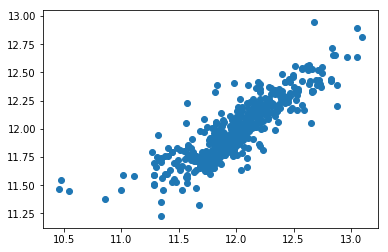

In [217]:
plt.scatter(y_test, y_pred)

Mean:  0.000303947785091
Std:  0.0177820072639


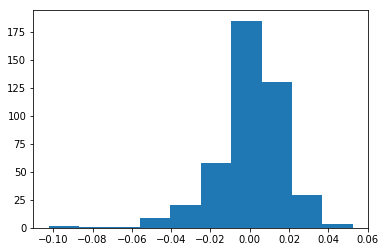

In [218]:
error_rate = (y_test - y_pred) / y_test
plt.hist(error_rate)
print('Mean: ', np.mean(error_rate))
print('Std: ', np.std(error_rate))

In [219]:
#y_pred

## SUBMIT

In [220]:
X = np.array(test_data[new_feature_cols])

In [221]:
X = X[:, selected_feature_index]

In [222]:
#ypred = rf.predict(X)
ypred = gra.predict(X)

In [223]:
ypred = np.exp(ypred)

In [225]:
submission = pd.DataFrame({
        "Id": test_ID,
        "SalePrice": ypred
    })
submission.to_csv('house.csv', index=False)

In [ ]:
#TEST:２つのモデルの予測結果の平均
model_01_pred = gra.predict(X_test[:, selected_feature_index])
model_02_pred = rf.predict(X_test[:, selected_feature_index])

In [ ]:
y_pred = (model_01_pred + model_02_pred) / 2

In [ ]:
print("Root Means Square:", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

In [ ]:
y_pred = (np.exp(model_01_pred) + np.exp(model_02_pred)) / 2

In [ ]:
submission = pd.DataFrame({
        "Id": test_ID,
        "SalePrice": ypred
    })
submission.to_csv('house.csv', index=False)